1/1 [==============================] - 0s 153ms/step


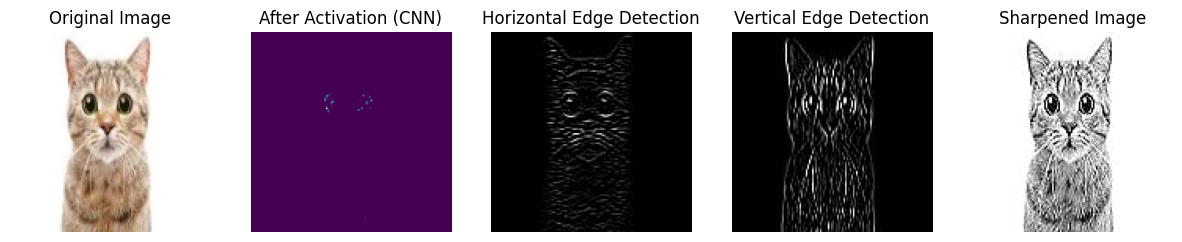

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Load and preprocess the image
image_path = 'cat.jpeg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read image. Check the file path and ensure the image exists.")
    exit()

# Resize and normalize the image
image_resized = cv2.resize(image, (128, 128))
image_resized_normalized = image_resized.astype('float32') / 255.0
image_resized_normalized = np.expand_dims(image_resized_normalized, axis=0)

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Extract activations from the first convolutional layer
activation_model = models.Model(inputs=model.input, outputs=model.layers[0].output)
activations = activation_model.predict(image_resized_normalized)
first_filter_activation = activations[0, :, :, 0]

# Custom filters (convolution kernels)
horizontal_edge_filter = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
vertical_edge_filter = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
sharpening_filter = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])

# Apply the filters using OpenCV
image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

# Apply horizontal edge filter
horizontal_edges = cv2.filter2D(image_gray, -1, horizontal_edge_filter)

# Apply vertical edge filter
vertical_edges = cv2.filter2D(image_gray, -1, vertical_edge_filter)

# Apply sharpening filter
sharpened_image = cv2.filter2D(image_gray, -1, sharpening_filter)

# Plot the original image, activation, and the results of the custom filters
fig, ax = plt.subplots(1, 5, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(first_filter_activation, cmap='viridis')
ax[1].axis('off')
ax[1].set_title('After Activation (CNN)')

ax[2].imshow(horizontal_edges, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Horizontal Edge Detection')

ax[3].imshow(vertical_edges, cmap='gray')
ax[3].axis('off')
ax[3].set_title('Vertical Edge Detection')

ax[4].imshow(sharpened_image, cmap='gray')
ax[4].axis('off')
ax[4].set_title('Sharpened Image')

plt.show()
